## Centroid Models

In this hands-on tutorial, we will learn how to use the k-means clustering algorithm from the Sklearn library.

In [1]:
# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

The description in the documentation of the function make_blobs, which we imported above, says: "generates isotropic Gaussian blobs for clustering". We will use the data generated by the function in this tutorial and also in the upcoming ones.

In [25]:
# generate clusters
X, y = make_blobs(n_samples=150,
                 n_features = 2, 
                 cluster_std = 0.5, 
                 random_state=0)


With the code above we generated 150 points in a 2-dimensional space. These points are divided into three clusters with standard deviations equal to 0.5 in each cluster. Let's plot these clusters.

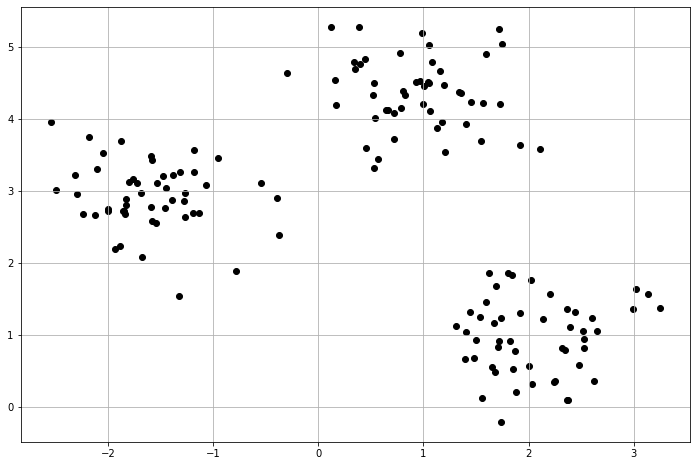

In [4]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot clusters
plt.scatter(X[:,0],
            X[:,1],
            c='black',
            marker='o')
plt.grid()
plt.show()

As we can see in the plot, we can clearly identify these clusters by just looking at it. But let's see whether the k-means algorithm can identify the clusters the same way as we did.

### **K-means** Clustering

The first thing we need to do before fitting the data is to instantiate the KMeans class from Sklearn by the following code:

In [6]:
km = KMeans(n_clusters=3, # how many cluster we experted
           n_init=10,  # how many initial runs
           random_state=0)

In the code above, we created an instantiation of the KMeans class. We set the number of clusters to three and the number of times the k-means algorithm will be run with different centroid seeds to ten. We also set the random_state parameter to easily reproduce the results.

Now it's time to fit the data and predict the clusters. In this example, we don't have to do the scaling because our features are from the same distribution.

In [7]:
# fit and predict
y_km = km.fit_predict(X)

**NOTE** Method .fit_predict() is combination of two methods which can be run separately as well:

.fit() - creates the model using the dataset in the argument of the function
.predict() - predicts the cluster for every row of the dataset in the argument of the function.

To plot how the k-means algorithm assigned the clusters to our data we need to define a function that does exactly this:

In [26]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                   y,
                   s = 50, 
                   marker='s',
                   label = f'cluster{cluster}')
        
        if plt_cluster_centers:
            plt.scatter(X_centroids,
                       Y_centroids, 
                       marker = '*',
                       c='red',
                       s=250,
                       label='centroids')
    
    plt.legend()
    plt.grid()
    plt.show()

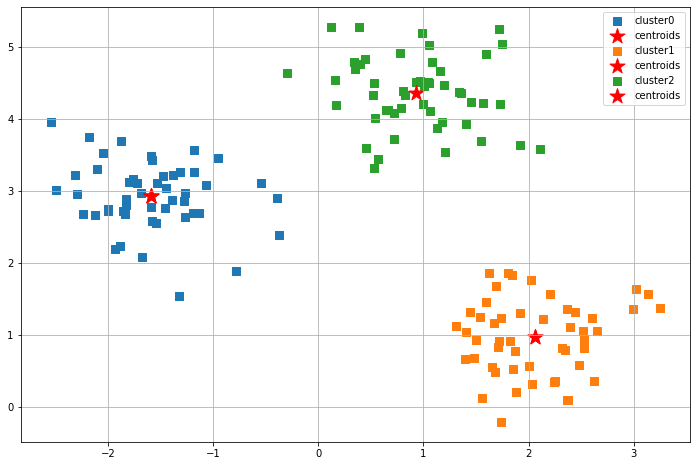

In [27]:
# plot clustering result
plot_clusters(X, y_km, plt_cluster_centers=True)

We can see from the plot that k-means assigned clusters exactly as we expected. Cluster centroids are marked in the plot as red stars.

### Elbow rule

A great tool for deciding how many clusters to choose (and therefore to evaluate our model) is the elbow rule in a distortion plot. We will fit the data with various numbers of clusters and store the distortion. **Distortion**, in sklearn called **inertia**, tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.

From the plot, we can decide how many clusters are suitable for our application. Let's calculate the distortion for multiple k values and plot the result:

In [21]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 
                    

The code above fits the data with the k-means algorithm and try different values of k (from 1 to 10). Values of k are stored with the inertia of clusters belongings to k. Let's plot the inertia for each of the tested values of k.

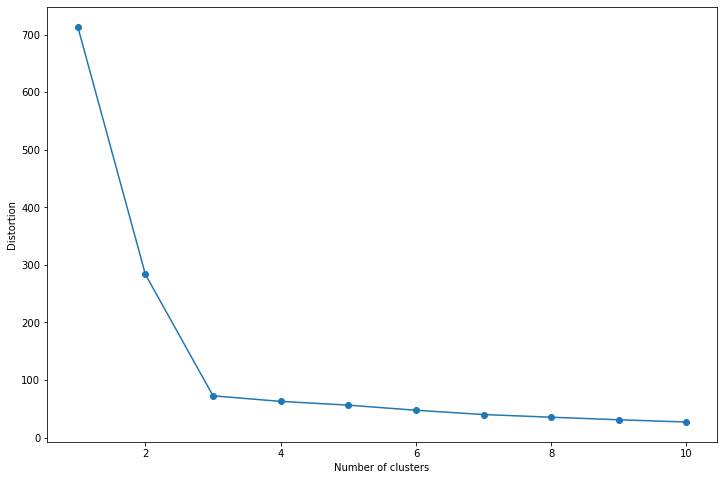

In [22]:
# elbow rule
plot_distortion(X, max_clusters=10)

We can see in the plot that while the number of clusters increases the distortion goes down. We can also see that by reaching 3 clusters, the distortion is pretty low. If we try to add another cluster (no. 4), the distortion doesn't go down as much as before. That point in a plot is called the elbow and is the point we wanted to find as an optimal number of clusters.